# Mental Health in Tech Survey
## Survey on Mental Health in the Tech Workplace in 2014

In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set_style("whitegrid")
#sns.set_context("poster")
pd.set_option('display.max_rows',1000)
%matplotlib inline

# Goal
### Goal of this project is to predict mental illness (sought treatment) with the given features by employing Machine Learning over a variety of models.

# Data Loading and Cleaning

In [2]:
data = pd.read_csv('./survey.csv')

In [3]:
data_raw = data.copy()

In [4]:
data.head().T

,0,1,2,3,4
Timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500


In [5]:
# What are the features
data.columns

Index([u'Timestamp', u'Age', u'Gender', u'Country', u'state', u'self_employed',
       u'family_history', u'treatment', u'work_interfere', u'no_employees',
       u'remote_work', u'tech_company', u'benefits', u'care_options',
       u'wellness_program', u'seek_help', u'anonymity', u'leave',
       u'mental_health_consequence', u'phys_health_consequence', u'coworkers',
       u'supervisor', u'mental_health_interview', u'phys_health_interview',
       u'mental_vs_physical', u'obs_consequence', u'comments'],
      dtype='object')

In [6]:
# What types of data
data.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [7]:
# Delete 'Timestamp' column for a start since we assume that the date a record is collected, is not predictive.
del data['Timestamp']

In [8]:
# Which Columns contain null data
data.columns[data.isnull().any()]

Index([u'state', u'self_employed', u'work_interfere', u'comments'], dtype='object')

In [9]:
# What's the coverage
data.isnull().mean().sort_values(ascending = False)

comments                     0.869738
state                        0.409055
work_interfere               0.209690
self_employed                0.014297
obs_consequence              0.000000
Gender                       0.000000
Country                      0.000000
family_history               0.000000
treatment                    0.000000
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
Age                          0.000000
dtype: float

In [10]:
# Delete 'comments' columns as it seems unimportant and has a large percentage of missing data
del data['comments']

In [11]:
# Handle the remaining missing data
data['state'] = data['state'].fillna('unknown')
data['work_interfere'] = data['work_interfere'].fillna('unknown')
data['self_employed'] = data['self_employed'].fillna('unknown')

In [12]:
# Get the summary statistics of the data
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1259,NaN,NaN,NaN,7.94281e+07,2.8183e+09,-1726,27,31,36,1e+11
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1259,46,unknown,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1259,3,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,1259,5,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_work,1259,2,No,883,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Column 'Age' contains spurious outliers. We look at the unique values present.
data.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [14]:
# 'Age' is now of type integers. It is better to transform 'Age' into categories: 'teen','adult','middle','old'
cat = pd.cut(data.Age,[-float('inf'),20,40,60,float('inf')],labels = ['teen','adult','middle','old'])
data['Age_cat'] = cat
del data['Age']

In [15]:
#Look at Gender
data.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [16]:
data.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Cis Male                                            2
Female                                              2
Female (trans)                                      2
queer/she/they                                      1
Female (cis)                                        1
Male-ish                                            1
male leaning androgynous    

In [17]:
# Merge Gender into types: 'female','male','trans'
data.Gender = data.Gender.apply(lambda x: x.lower())

male = set(["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"])
female = set(["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"])
trans = set(["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"])

In [18]:
data.Gender = data.Gender.apply(lambda x: 'male' if x in male else x)
data.Gender = data.Gender.apply(lambda x: 'female' if x in female else x)
data.Gender = data.Gender.apply(lambda x: 'trans' if x in trans else x)

In [19]:
# What's left in Gender ?
data.Gender.value_counts()

male                  991
female                247
trans                  19
p                       1
a little about you      1
Name: Gender, dtype: int64

In [20]:
# Delete meaningless values 'p' and 'a little about you'
data = data[data.Gender != 'p']
data = data[data.Gender != 'a little about you']

In [21]:
# Summary statistics of the cleaned data
data.describe(include = 'all').T

,count,unique,top,freq
Gender,1257,3,male,991
Country,1257,47,United States,750
state,1257,46,unknown,515
self_employed,1257,3,No,1095
family_history,1257,2,No,767
treatment,1257,2,Yes,635
work_interfere,1257,5,Sometimes,465
no_employees,1257,6,6-25,290
remote_work,1257,2,No,883
tech_company,1257,2,Yes,1029


In [22]:
# List to collect the summary of all models
Result = []

#                                Machine Learning on the Data

# 1. Data Scheme: Label Encoding (LE)

In [23]:
# Split data into target('y') and features('X')
y = data.treatment == 'Yes'
del data['treatment']
X = data

In [24]:
# Apply label encoding to feature space
X = X.apply(LabelEncoder().fit_transform)

In [25]:
X.head().T

,0,1,2,3,4
Gender,0,1,1,1,1
Country,44,44,6,43,44
state,10,11,45,45,37
self_employed,2,2,2,2,2
family_history,0,0,0,1,0
work_interfere,1,2,2,1,0
no_employees,4,5,4,2,1
remote_work,0,0,0,0,1
tech_company,1,0,1,1,1
benefits,2,0,1,1,2


## 1.1 Logistic Regression (LR)

### 1.1.1 K-fold Cross Validation using the inverse of regularisation parameter (C) under Logistic Regression Classifier

In [26]:
C = [10000,100, 1, 0.01,0.0001] 
cv_score = []
for c in C:
    lr = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(lr,X,y,cv = 5,scoring='accuracy')
    cv_score.append(scores.mean())

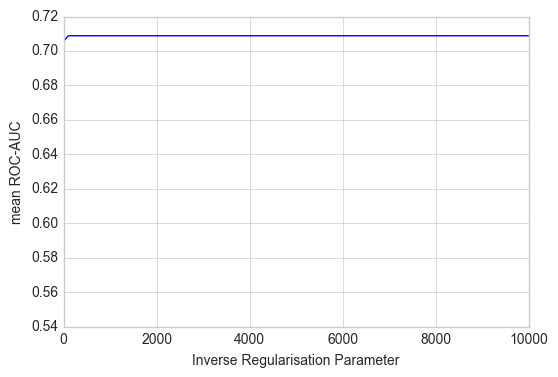

In [27]:
plt.plot(C,cv_score) 
plt.ylabel('mean ROC-AUC')
plt.xlabel('Inverse Regularisation Parameter')
plt.show()

In [28]:
print 'The maximum mean ROC-AUC score of', max(cv_score), 'occurs for the model with inverse parameter:', C[np.argmax(cv_score)]

The maximum mean ROC-AUC score of 0.708821855435 occurs for the model with inverse parameter: 10000


In [29]:
Result.append(('LE: LR with full data (roc_auc)', max(cv_score)))

### ROC Curve for the model with highest 'accuracy'

In [30]:
lr = linear_model.LogisticRegression(C=C[np.argmax(cv_score)])
SEED = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

lr.fit(X_train,y_train)
probs = lr.predict_proba(X_test)[:,1] # get the probabilities of positive outcome

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

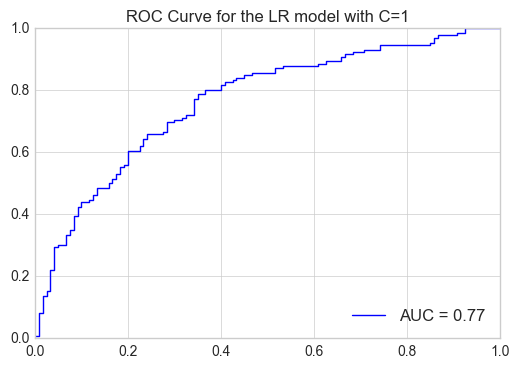

In [31]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the LR model with C=1')
plt.legend(loc =4)
plt.show()

### 1.1.2 Principal Component Analysis before training Logistic Regression classifier (Pre-Processing)

In [32]:
pca = PCA(n_components=7)
SEED = 420
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
# Pick the top 90 components of PCA
XPCA_train = pca.fit_transform(X_train)
# Transform test set accordingly
XPCA_test = pca.transform(X_test)

In [33]:
C = [10000,100, 1, 0.01,0.0001]
in_score = []
out_score = []
for c in C:
    lr = linear_model.LogisticRegression(C=c)
    lr.fit(XPCA_train,y_train)
    in_score.append(lr.score(XPCA_train,y_train))
    out_score.append(lr.score(XPCA_test,y_test))

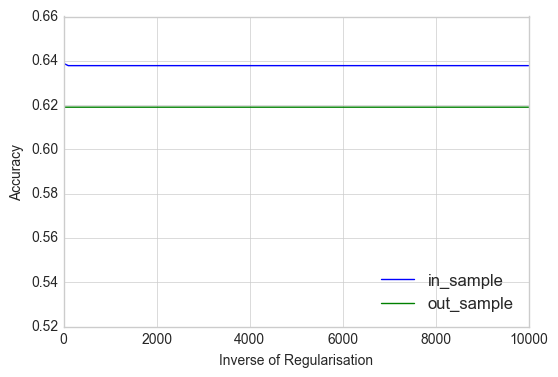

In [34]:
plt.plot(C,in_score, label='in_sample')  
plt.plot(C,out_score, label='out_sample')
plt.ylabel('Accuracy')
plt.xlabel('Inverse of Regularisation')
plt.legend(loc = 4)
plt.show()

In [35]:
print 'Highest out-sample accuracy', max(out_score), 'occurs for the model with C =', C[np.argmax(out_score)]

Highest out-sample accuracy 0.619047619048 occurs for the model with C = 10000


 #### ROC Curve for the model with highest 'accuracy'

In [36]:
lr = linear_model.LogisticRegression(C=C[np.argmax(out_score)])

lr.fit(XPCA_train,y_train)
probs = lr.predict_proba(XPCA_test)[:,1] # get the probabilities of positive outcom

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
Result.append(('LE: LR model with preprocessing, roc_auc',roc_auc))

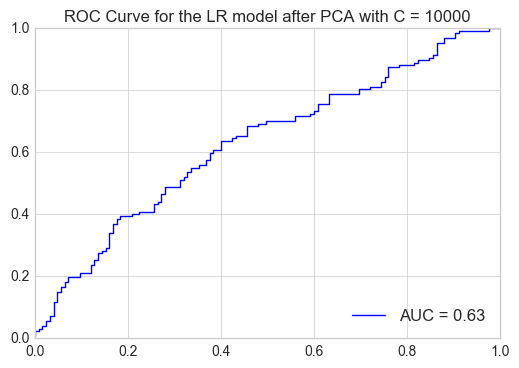

In [37]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the LR model after PCA with C = %d' %C[np.argmax(out_score)])
plt.legend(loc =4)
plt.show()

### 1.1.3 Feature Selection Using Recursive Feature Extraction (post-processing)

In [38]:
SEED = 420
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Use the model parameter with the highest roc-auc score (1.1.1) to train a model
lrf = linear_model.LogisticRegression(C=C[np.argmax(cv_score)]) 
# Recursively select the top 10 features
selector = RFE(lrf, 10, step=2) 
selector = selector.fit(X_train, y_train) 

In [39]:
# Collect the top 10 features together
mask = selector.support_
top_features = X.columns[mask]
X_top = X[top_features]

### Top ten most predictive features according to feature extraction

In [40]:
for f in X_top.columns:
    print f

Gender
family_history
remote_work
benefits
care_options
phys_health_consequence
coworkers
supervisor
mental_health_interview
obs_consequence


In [41]:
# Train Logistic Regression clf and cross validate on the top features X_top
C = [10000,100, 1, 0.01,0.0001] 
cv_score = [] 
for c in C:
    lr = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(lr,X_top,y,cv = 5,scoring='roc_auc')
    cv_score.append(scores.mean()) 

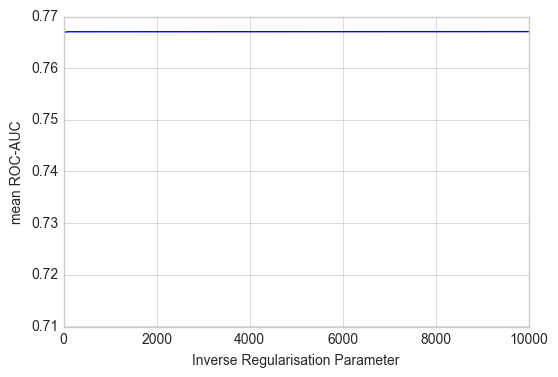

In [42]:
plt.plot(C,cv_score)
plt.ylabel('mean ROC-AUC')
plt.xlabel('Inverse Regularisation Parameter')
plt.show()

In [43]:
print 'Highest mean roc_auc of', max(cv_score), 'occurs for C = ', C[np.argmax(cv_score)]

Highest mean roc_auc of 0.76707482855 occurs for C =  10000


In [44]:
Result.append(('LE: LR model after post-processing(feature extraction), roc_auc',max(cv_score)))

#### ROC Curve for the model with highest mean ROC_AUC

In [45]:
# Run Logistic regression on the top 10 features
lr_top = linear_model.LogisticRegression(C=C[np.argmax(cv_score)])
SEED = 42
X_top_train, X_top_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=SEED)
lr_top.fit(X_top_train,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
probs = lr_top.predict_proba(X_top_test)[:,1] # get the probabilities of positive outcome
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

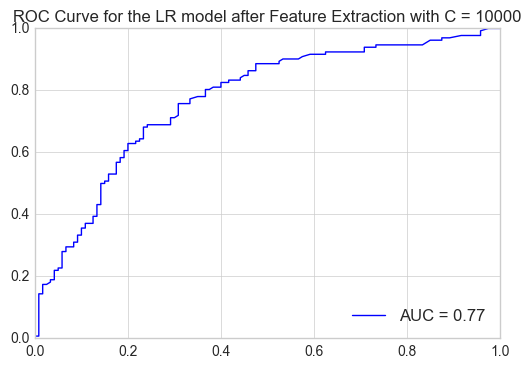

In [47]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the LR model after Feature Extraction with C = %d' %C[np.argmax(cv_score)])
plt.legend(loc = 4)
plt.show()

## 1.2 Random Forest

### 1.2.1 K-fold cross validation against number of estimators using Random Forest classifier


In [48]:
# random Forest
ks = [10,20,50,100,1000]
cv_score = []
for k in ks:
    RF = RandomForestClassifier(n_estimators=k, oob_score=False, random_state=42)
    scores = cross_val_score(RF,X,y,cv = 5,scoring='roc_auc')
    cv_score.append(scores.mean())

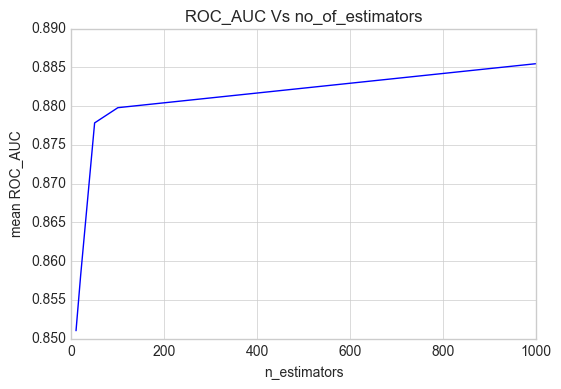

In [49]:
plt.plot(ks,cv_score)
plt.title('ROC_AUC Vs no_of_estimators')
plt.ylabel('mean ROC_AUC')
plt.xlabel('n_estimators')
plt.show()

In [50]:
print 'The highest mean roc_auc score of', max(cv_score), 'occurs for n_estimators =', ks[np.argmax(cv_score)]

The highest mean roc_auc score of 0.885464465329 occurs for n_estimators = 1000


In [51]:
Result.append(('LE: RF full data, roc_auc',max(cv_score)))

In [52]:
RF = RandomForestClassifier(n_estimators= ks[np.argmax(cv_score)],oob_score=False, random_state=42)
SEED = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

res = RF.fit(X_train,y_train)
probs = res.predict_proba(X_test)[:,1] # get the probabilities of positive outcome

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

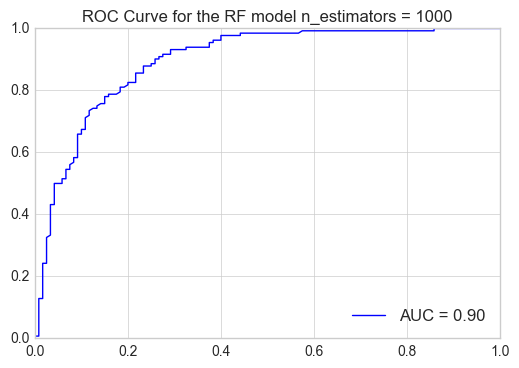

In [53]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the RF model n_estimators = %d' %ks[np.argmax(cv_score)])
plt.legend(loc = 4)
plt.show()

### 1.2.2 Random Forest classifier after PCA analysis (pre-processing)


In [54]:
#Train RF clf on reduced data by PCA analysis (1.1.2)
ks = [10,20,50,100,1000]
in_score = []
out_score = []
print 'running model k =',
for k in ks:
    print k,
    clf = RandomForestClassifier(n_estimators=k, oob_score=False, random_state=42)
    res = clf.fit(XPCA_train, y_train)
    in_score.append(res.score(XPCA_train, y_train)) 
    out_score.append(res.score(XPCA_test, y_test))

running model k = 10 20 50 100 1000


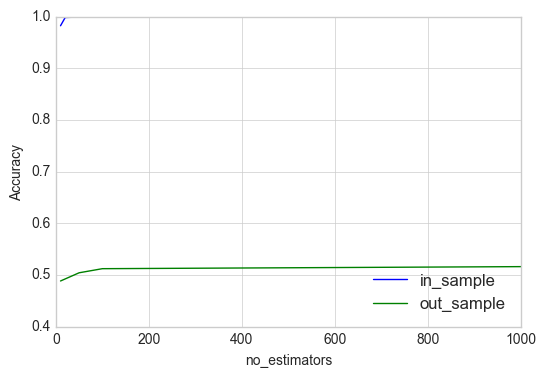

In [55]:
plt.plot(ks,in_score, label='in_sample')
plt.plot(ks,out_score, label='out_sample')
plt.ylabel('Accuracy')
plt.xlabel('no_estimators')
plt.legend(loc = 4)
plt.show()

In [56]:
print 'Highest accuracy score of', max(out_score), 'occurs for n_estimators =', ks[np.argmax(out_score)]

Highest accuracy score of 0.515873015873 occurs for n_estimators = 1000


#### ROC Curve for the model with highest 'accuracy'

In [57]:
clf = RandomForestClassifier(n_estimators= ks[np.argmax(out_score)], oob_score=False, random_state=42)
res = clf.fit(XPCA_train, y_train)
probs = res.predict_proba(XPCA_test)[:,1] # get the probabilities of positive outcom
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
Result.append(('LE: RF after pre-processing (pca), roc_auc',roc_auc))

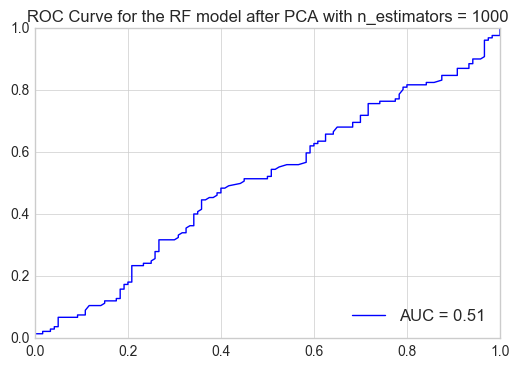

In [58]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the RF model after PCA with n_estimators = %d' %ks[np.argmax(out_score)])
plt.legend(loc =4)
plt.show()

### 1.2.3 Feature Selection Using Feature importance in RF (Post-Processing)

In [59]:
#Use the model with the highest mean ROC_AUC (1.2.1) to identify the most important features
RF = RandomForestClassifier(n_estimators=ks[np.argmax(cv_score)], oob_score=False, random_state=42)
RF = RF.fit(X_train, y_train)

In [60]:
#Collect the top 10 features
X_top = X.ix[:,RF.feature_importances_.argsort()[::-1][:10]]

### Top features with most predictive power according RF Feature Imporance

In [61]:
for f in X_top.columns:
    print f

work_interfere
family_history
state
no_employees
care_options
Country
leave
benefits
mental_health_consequence
phys_health_interview


### Plot of the predictivity of features

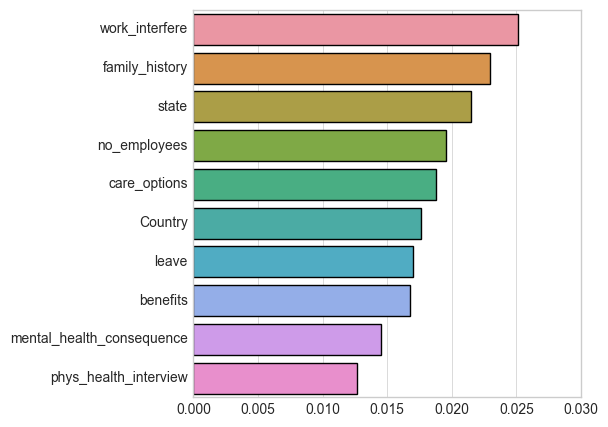

In [62]:
imp = sorted(RF.feature_importances_)
imp = imp[:10][::-1]
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(y=X_top.columns, x= imp,ax = ax)
plt.show()

In [63]:
#Run cross-validation on this reduced data set
ks = [10,20,50,100,1000]
cv_score = []
print 'running model k=',
for k in ks:
    print k,
    RF = RandomForestClassifier(n_estimators=k, oob_score=False, random_state=42)
    scores = cross_val_score(RF,X_top,y,cv = 5,scoring='roc_auc')
    cv_score.append(scores.mean())

running model k= 10 20 50 100 1000


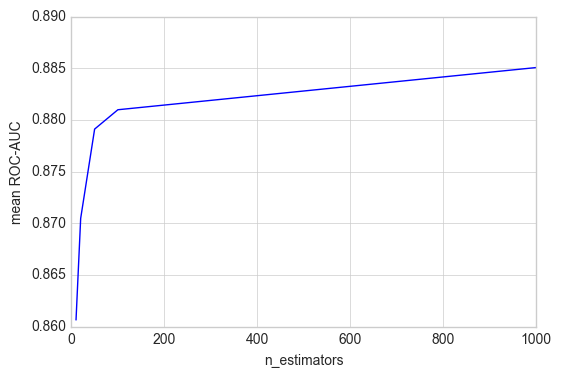

In [64]:
plt.plot(ks,cv_score)
plt.xlabel('n_estimators')
plt.ylabel('mean ROC-AUC')
plt.show()

In [65]:
print 'Highest mean roc_auc score of', max(cv_score), 'occurs for n_estimators =', ks[np.argmax(cv_score)]

Highest mean roc_auc score of 0.885061010922 occurs for n_estimators = 1000


In [66]:
Result.append(('LE: RF after post-processing, roc_auc',max(cv_score)))

#### ROC Curve for the model with highest mean ROC_AUC

In [67]:
RF = RandomForestClassifier(n_estimators= ks[np.argmax(cv_score)],oob_score=False, random_state=42)
SEED = 32
X_top_train, X_top_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=SEED)

res = RF.fit(X_top_train,y_train)
probs = res.predict_proba(X_top_test)[:,1] # get the probabilities of positive outcome

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

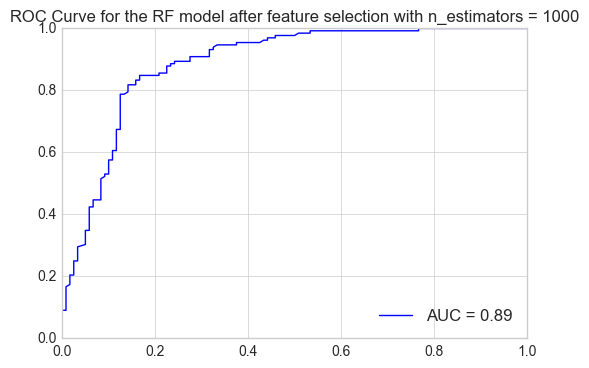

In [68]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the RF model after feature selection with n_estimators = %d' %ks[np.argmax(out_score)])
plt.legend(loc = 4)
plt.show()

# 2. Data Scheme: One-Hot-Encoding

### Predictive Power of Each Feature: ROC_AUC results when each feature is One-Hot-Encoded and trained using Logistic Regression

In [69]:
C = [10000,100, 1, 0.01,0.0001]
cv_score = []
result = []
for col in data.columns:
    col_code = pd.get_dummies(data[col])
    for c in C:
        lr = linear_model.LogisticRegression(C=c)
        scores = cross_val_score(lr,col_code,y,cv = 5, scoring = 'roc_auc')
        cv_score.append(scores.mean())
    result.append((col,max(cv_score)))
    #print col, max(cv_score)
    cv_score = []
result.sort(key=lambda tup: tup[1])
result = result[::-1]
for i,j in result:
    print i, j

work_interfere 0.857354737109
family_history 0.683697739395
care_options 0.622615494031
benefits 0.622343053086
Gender 0.581118923038
mental_health_consequence 0.56974015748
anonymity 0.568656794514
leave 0.567065989332
state 0.563501498603
mental_vs_physical 0.561978511557
obs_consequence 0.554148082296
Country 0.546212700025
seek_help 0.545223469647
wellness_program 0.54395986792
mental_health_interview 0.538379476759
Age_cat 0.521461569723
phys_health_consequence 0.518253340107
no_employees 0.515682956566
tech_company 0.512385877572
remote_work 0.511227482855
coworkers 0.508808585217
supervisor 0.505997307595
self_employed 0.504925425451
phys_health_interview 0.49601503683


In [70]:
X_ohe = pd.get_dummies(data,[col for col in data.columns])

In [71]:
X_ohe.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258
Gender_female,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Gender_male,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Gender_trans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Bosnia and Herzegovina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Bulgaria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country_Canada,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.1 Logistic Regression
### 2.1.1 K-fold Cross Validation using the inverse of regularisation parameter (C) under Logistic Regression Classifier

In [72]:
C = [10000,100, 1, 0.01,0.0001] 
cv_score = []
for c in C:
    lr = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(lr,X_ohe,y,cv = 5,scoring='accuracy')
    cv_score.append(scores.mean())

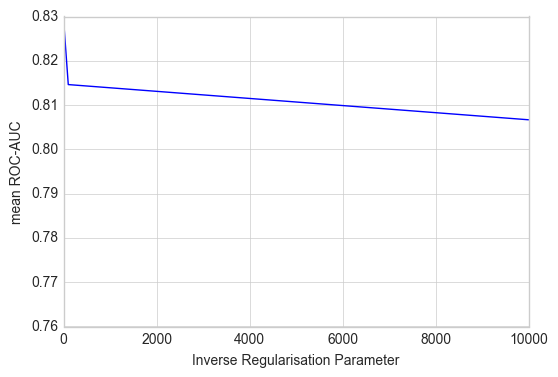

In [73]:
plt.plot(C,cv_score) 
plt.ylabel('mean ROC-AUC')
plt.xlabel('Inverse Regularisation Parameter')
plt.show()

In [74]:
print 'The maximum mean ROC-AUC score of', max(cv_score), 'occurs for the model with inverse parameter:', C[np.argmax(cv_score)]

The maximum mean ROC-AUC score of 0.828954025169 occurs for the model with inverse parameter: 1


In [75]:
Result.append(('OHE: LR with full data, roc_auc',max(cv_score)))

#### ROC Curve for the model with highest mean ROC_AUC

In [76]:
lr = linear_model.LogisticRegression(C=C[np.argmax(cv_score)])
SEED = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

lr.fit(X_train,y_train)
probs = lr.predict_proba(X_test)[:,1] # get the probabilities of positive outcome

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

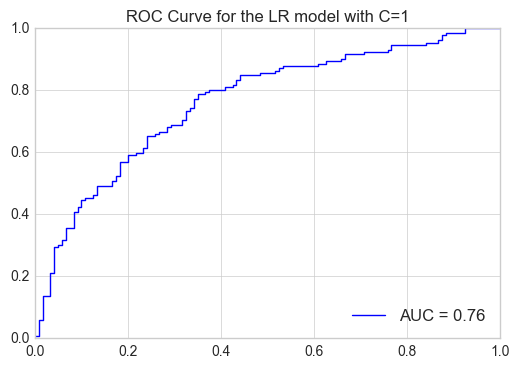

In [77]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the LR model with C=1')
plt.legend(loc =4)
plt.show()

### 2.1.2 Principal Component Analysis before training Logistic Regression classifier (Pre-Processing)

In [78]:
pca = PCA(n_components=50)
SEED = 420
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=SEED)
# Pick the top 50 components of PCA
XPCA_train = pca.fit_transform(X_train)
# Transform test set accordingly
XPCA_test = pca.transform(X_test)

In [79]:
C = [10000,100, 1, 0.01,0.0001]
in_score = []
out_score = []
for c in C:
    lr = linear_model.LogisticRegression(C=c)
    lr.fit(XPCA_train,y_train)
    in_score.append(lr.score(XPCA_train,y_train))
    out_score.append(lr.score(XPCA_test,y_test))

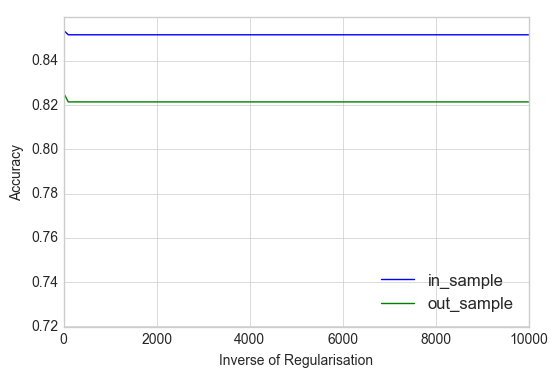

In [80]:
plt.plot(C,in_score, label='in_sample')  
plt.plot(C,out_score, label='out_sample')
plt.ylabel('Accuracy')
plt.xlabel('Inverse of Regularisation')
plt.legend(loc = 4)
plt.show()

In [81]:
print 'Highest out-sample accuracy', max(out_score), 'occurs for the model with C =', C[np.argmax(out_score)]

Highest out-sample accuracy 0.825396825397 occurs for the model with C = 1


#### ROC Curve for the model with highest 'accuracy'

In [82]:
lr = linear_model.LogisticRegression(C=C[np.argmax(out_score)])

lr.fit(XPCA_train,y_train)
probs = lr.predict_proba(XPCA_test)[:,1] # get the probabilities of positive outcom

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
Result.append(('OHE: LR after pre-processing(pca), roc_auc',roc_auc))

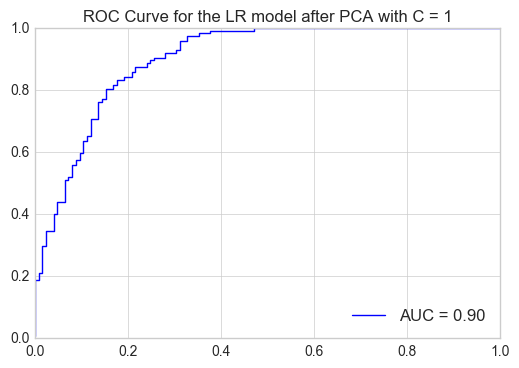

In [83]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the LR model after PCA with C = %d' %C[np.argmax(out_score)])
plt.legend(loc =4)
plt.show()

### 2.1.3 Feature Selection Using Recursive Feature Extraction (post-processing)

In [84]:
SEED = 420
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=SEED)

# Use the model parameter with the highest roc-auc score (2.1.1) to train a model
lrf = linear_model.LogisticRegression(C=C[np.argmax(cv_score)]) 
# Recursively select the top 90 features
selector = RFE(lrf, 50, step=5) 
selector = selector.fit(X_train, y_train) 

In [85]:
# Collect the top 50 features together
mask = selector.support_
top_features = X_ohe.columns[mask]
X_ohe_top = X_ohe[top_features]

In [86]:
# Train Logistic Regression clf and cross validate on the top features X_top
C = [10000,100, 1, 0.01,0.0001] 
cv_score = [] 
for c in C:
    lr = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(lr,X_ohe_top,y,cv = 5,scoring='roc_auc')
    cv_score.append(scores.mean()) 

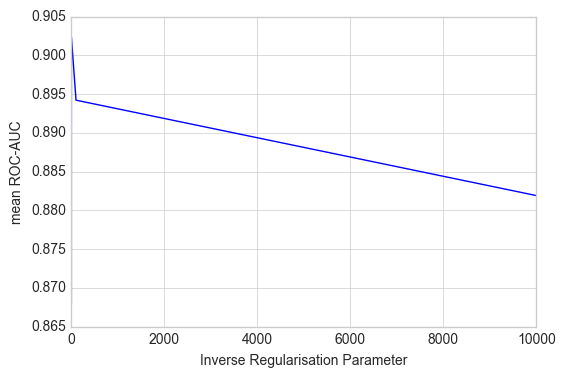

In [87]:
plt.plot(C,cv_score)
plt.ylabel('mean ROC-AUC')
plt.xlabel('Inverse Regularisation Parameter')
plt.show()

In [88]:
print 'Highest mean roc_auc of', max(cv_score), 'occurs for C = ', C[np.argmax(cv_score)]

Highest mean roc_auc of 0.902341732283 occurs for C =  1


In [89]:
Result.append(('OHE: LR after post-processing(RFE), roc_auc',max(cv_score)))

#### ROC Curve for the model with highest mean ROC_AUC

In [90]:
# Run Logistic regression on the top 50 features
lr_top = linear_model.LogisticRegression(C=C[np.argmax(cv_score)])
SEED = 42
X_ohe_top_train, X_ohe_top_test, y_train, y_test = train_test_split(X_ohe_top, y, test_size=0.2, random_state=SEED)
lr_top.fit(X_ohe_top_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
probs = lr_top.predict_proba(X_ohe_top_test)[:,1] # get the probabilities of positive outcome
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

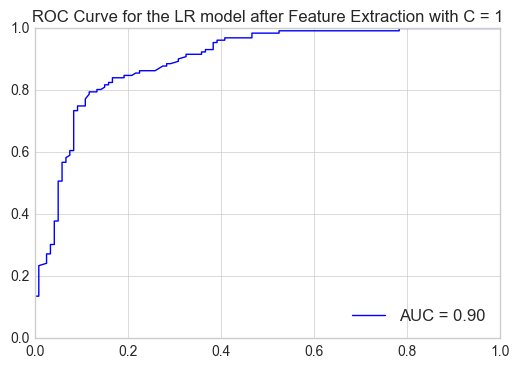

In [92]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the LR model after Feature Extraction with C = %d' %C[np.argmax(cv_score)])
plt.legend(loc = 4)
plt.show()

## 2.2 Random Forest
### 2.2.1 K-fold cross validation against number of estimators using Random Forest classifier

In [93]:
ks = [10,20,50,100,1000]
cv_score = []
for k in ks:
    RF = RandomForestClassifier(n_estimators=k, oob_score=False, random_state=42)
    scores = cross_val_score(RF,X_ohe,y,cv = 5,scoring='roc_auc')
    cv_score.append(scores.mean())

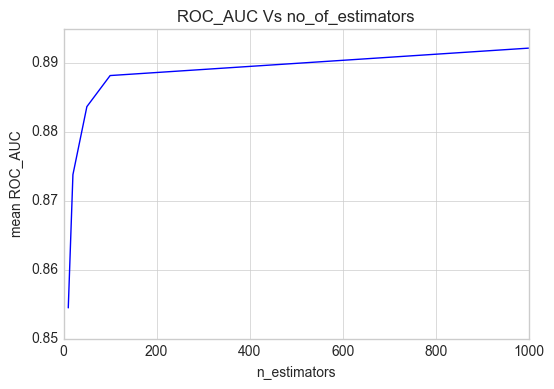

In [94]:
plt.plot(ks,cv_score)
plt.title('ROC_AUC Vs no_of_estimators')
plt.ylabel('mean ROC_AUC')
plt.xlabel('n_estimators')
plt.show()

In [95]:
print 'The highest mean roc_auc score of', max(cv_score), 'occurs for n_estimators =', ks[np.argmax(cv_score)]

The highest mean roc_auc score of 0.8921497587 occurs for n_estimators = 1000


In [96]:
Result.append(('OHE: RF with full data, roc_auc',max(cv_score)))

#### ROC Curve for the model with highest mean ROC_AUC

In [97]:
RF = RandomForestClassifier(n_estimators= ks[np.argmax(cv_score)],oob_score=False, random_state=42)
SEED = 32
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=SEED)

res = RF.fit(X_train,y_train)
probs = res.predict_proba(X_test)[:,1] # get the probabilities of positive outcome

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

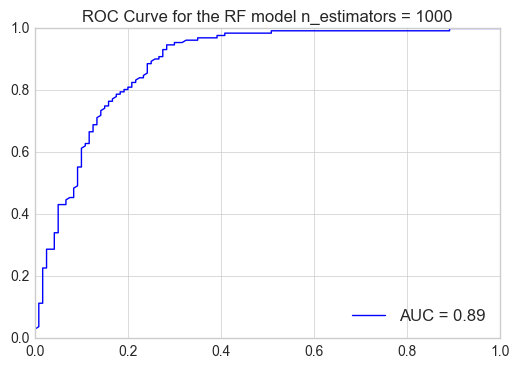

In [98]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the RF model n_estimators = %d' %ks[np.argmax(cv_score)])
plt.legend(loc = 4)
plt.show()

### 2.2.2 Random Forest classifier after PCA analysis (pre-processing)

In [99]:
#Train RF clf on reduced data by PCA analysis (1.1.2)
ks = [10,20,50,100,1000]
in_score = []
out_score = []
print 'running model k =',
for k in ks:
    print k,
    clf = RandomForestClassifier(n_estimators=k, oob_score=False, random_state=42)
    res = clf.fit(XPCA_train, y_train)
    in_score.append(res.score(XPCA_train, y_train)) 
    out_score.append(res.score(XPCA_test, y_test))

running model k = 10 20 50 100 1000


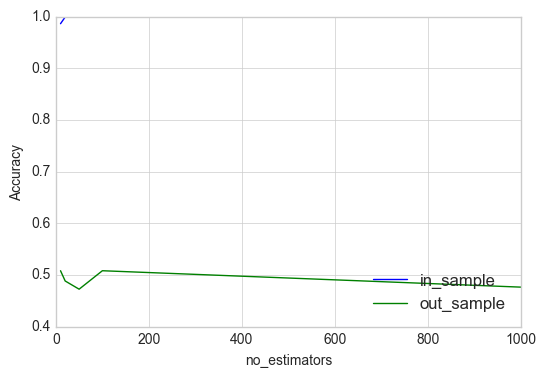

In [100]:
plt.plot(ks,in_score, label='in_sample')
plt.plot(ks,out_score, label='out_sample')
plt.ylabel('Accuracy')
plt.xlabel('no_estimators')
plt.legend(loc = 4)
plt.show()

In [101]:
print 'Highest accuracy score of', max(out_score), 'occurs for n_estimators =', ks[np.argmax(out_score)]

Highest accuracy score of 0.507936507937 occurs for n_estimators = 10


#### ROC Curve for the model with highest 'accuracy'

In [102]:
clf = RandomForestClassifier(n_estimators= ks[np.argmax(out_score)], oob_score=False, random_state=42)
res = clf.fit(XPCA_train, y_train)
probs = res.predict_proba(XPCA_test)[:,1] # get the probabilities of positive outcom
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
Result.append(('OHE, RF with pre-processing(pca), roc_auc',roc_auc))

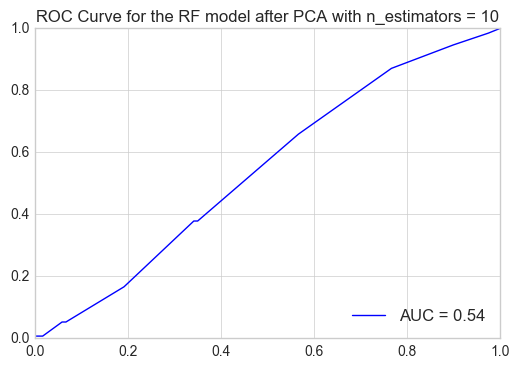

In [103]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the RF model after PCA with n_estimators = %d' %ks[np.argmax(out_score)])
plt.legend(loc =4)
plt.show()

### 2.2.3 Feature Selection Using Feature importance in RF (Post-Processing)

In [104]:
#Use the model with the highest mean ROC_AUC (2.2.1) to identify the most important features
RF = RandomForestClassifier(n_estimators=ks[np.argmax(cv_score)], oob_score=False, random_state=42)
RF = RF.fit(X_train, y_train)

In [105]:
#Collect the top 50 features
X_top = X_ohe.ix[:,RF.feature_importances_.argsort()[::-1][:50]]

### Bar plot of the relative predictive power of features

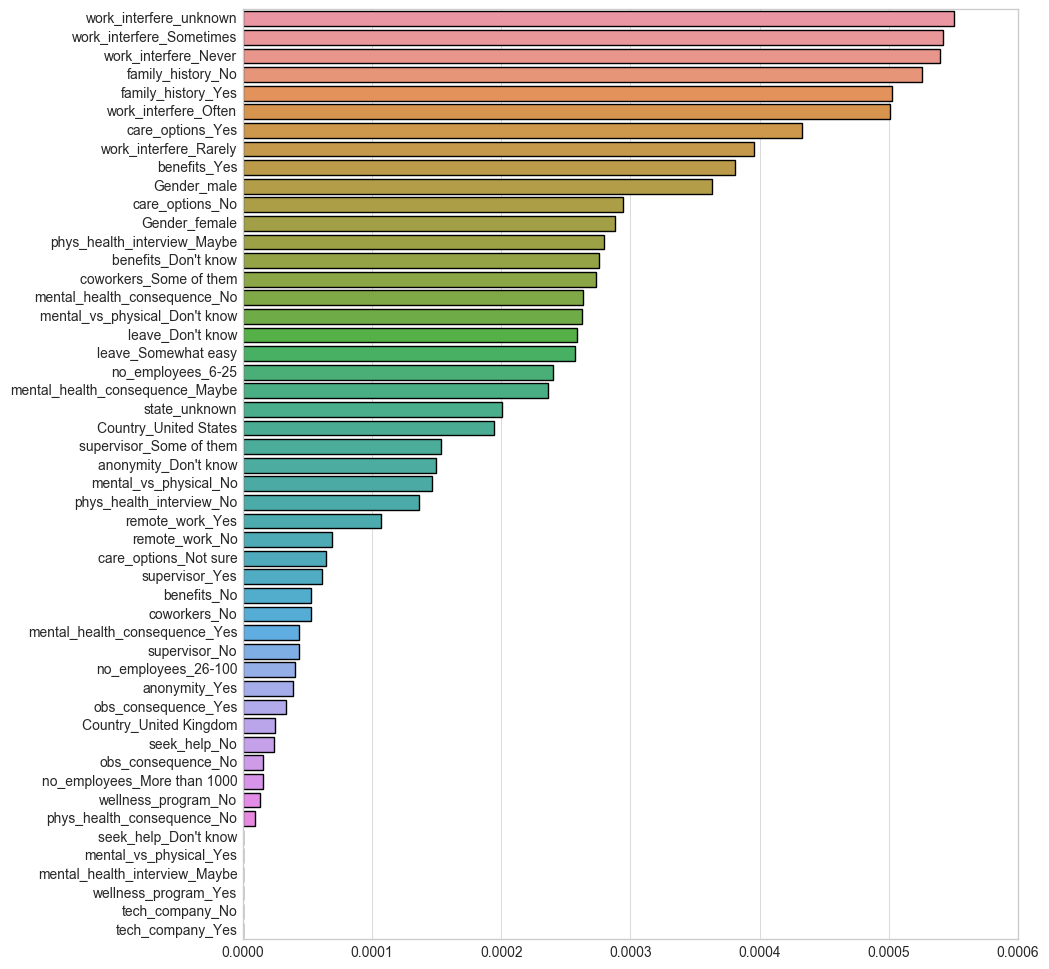

In [106]:
imp = sorted(RF.feature_importances_)
imp = imp[:50][::-1]
fig, ax = plt.subplots(figsize=(10,12))
sns.barplot(y=X_top.columns, x= imp,ax = ax)
plt.show()

In [107]:
#Run cross-validation on this reduced data set
ks = [10,20,50,100,1000]
cv_score = []
print 'running model k=',
for k in ks:
    print k,
    RF = RandomForestClassifier(n_estimators=k, oob_score=False, random_state=42)
    scores = cross_val_score(RF,X_top,y,cv = 5,scoring='roc_auc')
    cv_score.append(scores.mean())

running model k= 10 20 50 100 1000


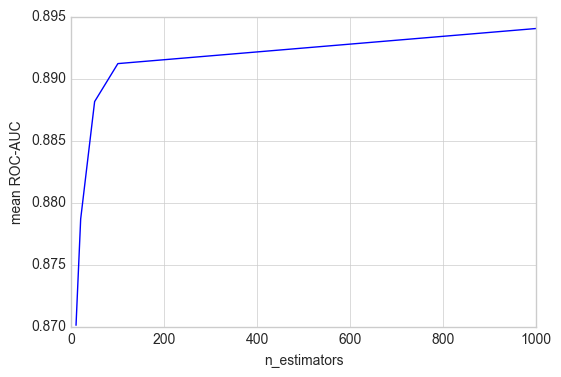

In [108]:
plt.plot(ks,cv_score)
plt.xlabel('n_estimators')
plt.ylabel('mean ROC-AUC')
plt.show()

In [109]:
print 'Highest mean roc_auc score of', max(cv_score), 'occurs for n_estimators =', ks[np.argmax(cv_score)]

Highest mean roc_auc score of 0.894033426467 occurs for n_estimators = 1000


In [110]:
Result.append(('OHE: RF with post-processing, roc_auc',max(cv_score)))

#### ROC Curve for the model with highest mean ROC_AUC


In [111]:
RF = RandomForestClassifier(n_estimators= ks[np.argmax(cv_score)],oob_score=False, random_state=42)
SEED = 32
X_top_train, X_top_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=SEED)

res = RF.fit(X_top_train,y_train)
probs = res.predict_proba(X_top_test)[:,1] # get the probabilities of positive outcome

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

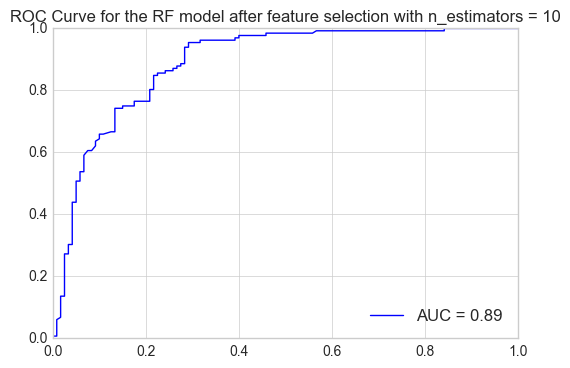

In [112]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.title('ROC Curve for the RF model after feature selection with n_estimators = %d' %ks[np.argmax(out_score)])
plt.legend(loc = 4)
plt.show()

# Geographical Variation of Mental Health (ratio of people who sought treatment)

In [113]:
countries = data['Country'].unique()

In [114]:
countries

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark', 'Greece',
       'Moldova', 'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

In [115]:
percentage = []
for co in countries:
    mask = data.Country == co
    percentage.append(y[mask].mean())

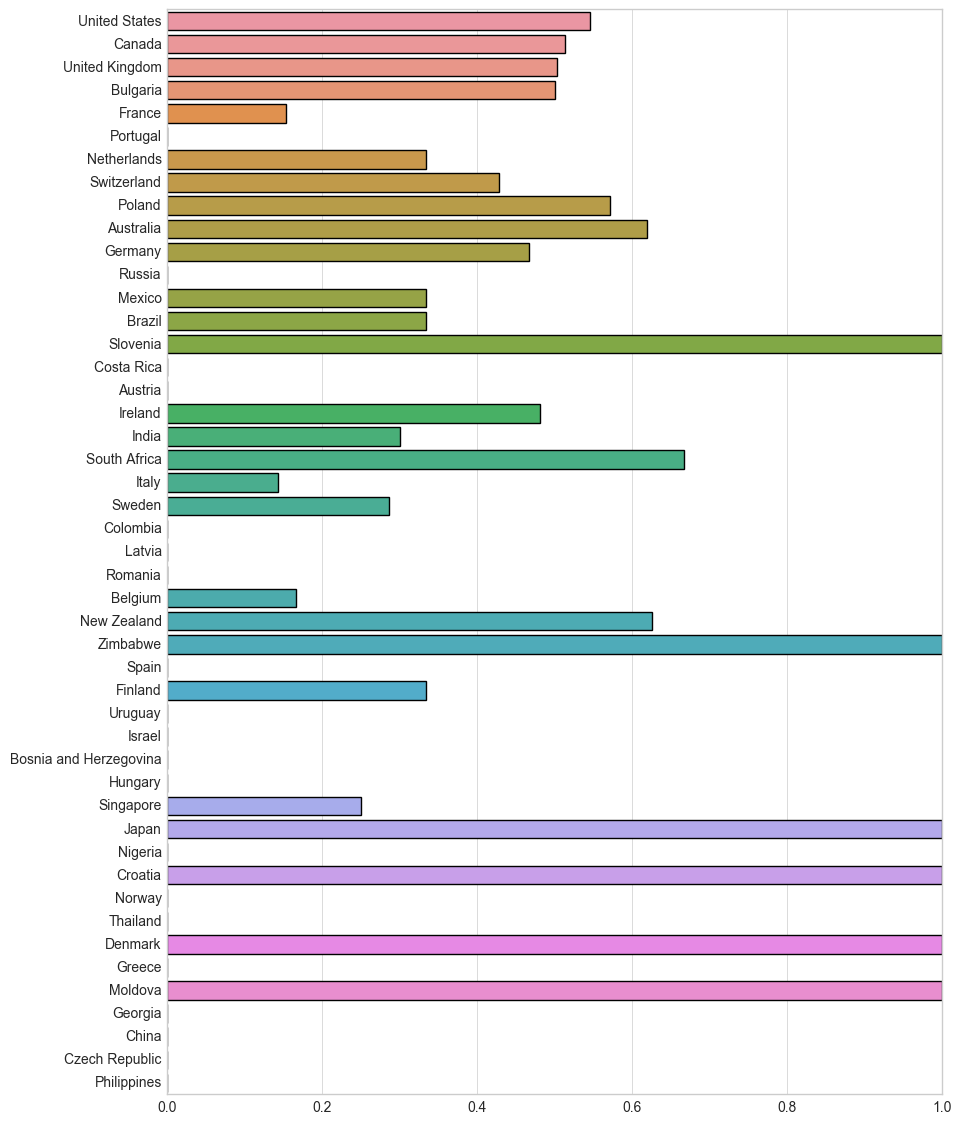

In [116]:
fig, ax = plt.subplots(figsize=(10,14))
sns.barplot(x=percentage, y= countries,ax = ax)
plt.show()

# Summary and Conclusion

### The results of the models tested, in decending order of 'accuracy'

In [117]:
Result.sort(key=lambda tup: tup[1])
Result = Result[::-1]

In [118]:
for model, res in Result:
    print model, res

OHE: LR after pre-processing(pca), roc_auc 0.902803149606
OHE: LR after post-processing(RFE), roc_auc 0.902341732283
OHE: RF with post-processing, roc_auc 0.894033426467
OHE: RF with full data, roc_auc 0.8921497587
LE: RF full data, roc_auc 0.885464465329
LE: RF after post-processing, roc_auc 0.885061010922
OHE: LR with full data, roc_auc 0.828954025169
LE: LR model after post-processing(feature extraction), roc_auc 0.76707482855
LE: LR with full data (roc_auc) 0.708821855435
LE: LR model with preprocessing, roc_auc 0.630677165354
OHE, RF with pre-processing(pca), roc_auc 0.543560606061
LE: RF after pre-processing (pca), roc_auc 0.50716540404


The investigation was conducted on two different data-schemes to encode catergorical data. They are
    1. Label Encoding: In this data scheme, the catergorical variables are transformed into numerical values. The advantage of this model is that it does not expand the dimensionality of the feature space, however, it creates a spurious ordinality among the categories which might mislead some classifiers
    
    2. One Hot Encoding: Encode categorical data by means of creating dummy variables for each category,i.e, 1 if it is present and 0 otherwise. This scheme does not introduce spurious ordinality among catergories, however, depending on the number of categories present, this scheme can increase the dimensionality of feature space. 
    
For each of these data schemes, both Logistic Regression and Random Forest Classifiers were used. Each classifier was further subdivided by training them on 1) the entire data scheme 2) Reduced data-set after PCA (pre-processing) 3) Reduced data-set after selecting the most important featurs (post-processing).

One-Hot-Encoding(OHE) with pca reduction using Logistic Regression achieves the highest roc_auc score. This may be explained: as OHE increases the dimensionality of feature space reducing the dimensions improves the accuracy (reduce overfitting). In general the data-scheme OHE performs better than LE, this is due to the fact that LE introduces spurious ordinality in data. PCA reduction on LE data scheme gives poor results since the already small dimensionality of the data (24) is further reduced to 10 by PCA thus reducing the explanatory power. It is to be noted that RF performs poorly after pre-processing (PCA) in both OHE and LE.